In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
x_data = np.linspace(start=0.0, stop=10.0, num=1000000)

In [5]:
noise = np.random.randn(len(x_data))

y = mx+b

b=5



In [6]:
y_true = (0.5* x_data) +5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [9]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:


my_data = pd.concat([x_df, y_df], axis=1)

In [11]:
my_data

,X Data,Y
0,0.00000,4.236281
1,0.00001,6.382962
2,0.00002,6.262986
3,0.00003,4.027771
4,0.00004,3.437104
5,0.00005,5.735099
6,0.00006,5.297714
7,0.00007,3.690477
8,0.00008,5.993339
9,0.00009,6.676792


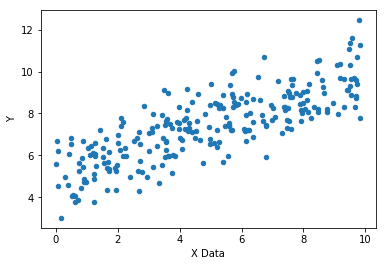

In [12]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data', y='Y')

In [13]:
batch_size = 8
np.random.rand(2)

array([0.60040807, 0.96780933])

In [14]:
m = tf.Variable(0.62)
b= tf.Variable(0.33)

In [15]:
### placeholder

In [16]:
xph = tf.placeholder(tf.float32,[batch_size])

In [17]:
yph = tf.placeholder(tf.float32, [batch_size])

In [18]:
y_model = m*xph +b

In [19]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    batches =1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])
    

In [23]:
model_m 

0.4502998

In [24]:
model_b

4.8502812

In [25]:
y_hat = x_data*model_m +model_b

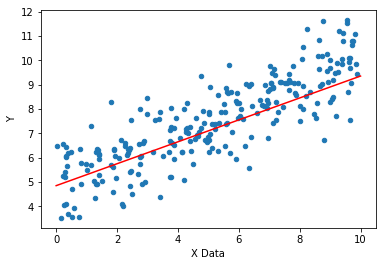

In [26]:
my_data.sample(250).plot(kind = 'scatter', x= 'X Data', y= 'Y')
plt.plot(x_data,y_hat, 'r')

In [27]:
### ESTIMATOR API

In [28]:
#defining a feature column
feat_col = [tf.feature_column.numeric_column(key='x', shape=[1])]

In [29]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x182e84d198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test, y_train, y_test = train_test_split(x_data,y_true, test_size =0.3, random_state=101)

In [32]:
print(x_train.shape)

(700000,)


In [33]:
x_test.shape

(300000,)

In [34]:
### Create a Estimator Data input function

In [36]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                               batch_size=8,
                                               num_epochs=None,
                                               shuffle=True)

In [37]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                     y_train,
                                                     batch_size=8,
                                                     num_epochs=1000,
                                                     shuffle=False)

In [38]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},
                                                    y_test,
                                                    batch_size=8,
                                                    shuffle=False,
                                                    num_epochs=1000)

In [39]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel/model.ckpt.
INFO:tensorflow:loss = 469.44754, step = 1
INFO:tensorflow:global_step/sec: 995.243
INFO:tensorflow:loss = 11.828571, step = 101 (0.102 sec)
INFO:tensorflow:global_step/sec: 1484.96
INFO:tensorflow:loss = 21.076216, step = 201 (0.068 sec)
INFO:tensorflow:global_step/sec: 1499.72
INFO:tensorflow:loss = 10.442604, step = 301 (0.066 sec)
INFO:tensorflow:global_step/sec: 1412.83
INFO:tensorflow:loss = 19.176619, step = 401 (0.071 sec)
INFO:tensorflow:global_step/sec: 1265.49
INFO:tensorflow:loss = 12.599907, step = 501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1395.34
INFO:tensorflow:loss = 5.3895087, step = 601 (0.072 sec)
INFO:tensorfl

In [40]:
###metrics of train data

In [41]:
train_matrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-27-00:35:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-27-00:35:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.087243, global_step = 1000, loss = 8.697944


In [42]:
test_metrics = estimator.evaluate(input_fn=test_input_func,
                                 steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-27-00:36:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-27-00:36:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0713114, global_step = 1000, loss = 8.570491


In [46]:
print('Training data Metrics')
print(train_matrics)

Training data Metrics
{'average_loss': 1.087243, 'loss': 8.697944, 'global_step': 1000}


In [47]:
print('Test data Metrics')
print(test_metrics)

Test data Metrics
{'average_loss': 1.0713114, 'loss': 8.570491, 'global_step': 1000}


In [48]:
### predict new input data
brand_new_data = np.linspace(0,10,10)


In [49]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle=False)

In [50]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4550214], dtype=float32)},
 {'predictions': array([5.0864477], dtype=float32)},
 {'predictions': array([5.7178736], dtype=float32)},
 {'predictions': array([6.3493], dtype=float32)},
 {'predictions': array([6.9807262], dtype=float32)},
 {'predictions': array([7.612152], dtype=float32)},
 {'predictions': array([8.243578], dtype=float32)},
 {'predictions': array([8.875005], dtype=float32)},
 {'predictions': array([9.506432], dtype=float32)},
 {'predictions': array([10.137857], dtype=float32)}]

In [51]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/01/g_8xj46j25v9kkjttk5p2j5h0000gn/T/tmpgy0_7zel/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [52]:
predictions

[array([4.4550214], dtype=float32),
 array([5.0864477], dtype=float32),
 array([5.7178736], dtype=float32),
 array([6.3493], dtype=float32),
 array([6.9807262], dtype=float32),
 array([7.612152], dtype=float32),
 array([8.243578], dtype=float32),
 array([8.875005], dtype=float32),
 array([9.506432], dtype=float32),
 array([10.137857], dtype=float32)]

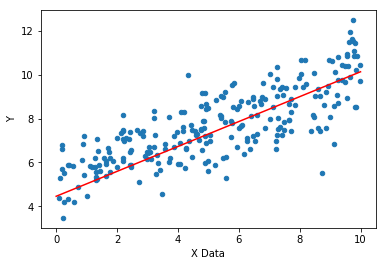

In [55]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data,predictions, 'r')
